**************
# Why neural network works
## Covers:
       Neural network is a stacked ensemble of linear classifiers ?
       How does it segment non-linear data?
       Why a non-linear activation function is important?

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

Lets create a synthetic database of normal 2d samples

In [29]:
#Creating the database
train_X = np.random.multivariate_normal([2.2, 2.2], [[0.1,0],[0,0.1]], 150)
train_Y = np.zeros(150)
train_X = np.concatenate((train_X, np.random.multivariate_normal([1.4, 1.3], [[0.05,0],[0,0.3]], 50)), axis=0)
train_Y = np.concatenate((train_Y, np.ones(50)))
train_X = np.concatenate((train_X, np.random.multivariate_normal([1.3, 2.9], [[0.05,0],[0,0.05]], 50)), axis=0)
train_Y = np.concatenate((train_Y, np.ones(50)))
train_X = np.concatenate((train_X, np.random.multivariate_normal([2.5, 0.95], [[0.1,0],[0,0.1]], 50)), axis=0)
train_Y = np.concatenate((train_Y, np.ones(50)))
#
#train_X = np.concatenate((train_X, np.random.normal(loc=1.8, scale=0.2, size=(2,30))), axis=1)

#Define colomaps for plots
cdict = {'red':   ((0.0, 0.8, 0.8),
                   (1.0, 1.0, 1.0)),
         'green': ((0.0, 0.8, 0.8),
                   (1.0, 0.8, 0.8)),
         'blue':  ((0.0, 1.0, 1.0),
                   (1.0, 0.8, 0.8))}

LightRdBu = LinearSegmentedColormap('LightRdBu', cdict)
cdict = {'red':   ((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),
         'blue':  ((0.0, 1.0, 1.0),
                   (1.0, 0.0, 0.0))}
BinaryRdBu = LinearSegmentedColormap('BinaryRdBu', cdict, 2)

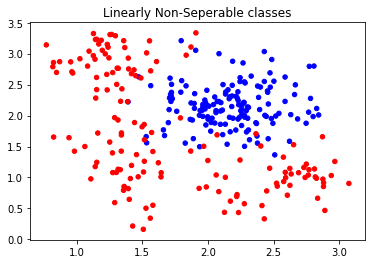

In [30]:
plt.scatter(train_X[:,0], train_X[:,1], s=20, c=train_Y,  cmap=BinaryRdBu, vmin=0, vmax=1)
plt.title('Linearly Non-Seperable classes')
plt.show()


## Lets create a single logistic regression classifier

In [31]:
#Tensorflow logitic regression
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None,1])
#y = tf.reshape(y, [200,1])
#Set Weights
W = tf.Variable(tf.truncated_normal([2,1],mean=0, stddev=0.1))
b = tf.Variable(tf.zeros([1]))

#model
logits = tf.sigmoid(tf.matmul(x, W) + b)
cost = tf.reduce_mean(tf.square(logits-y))

#cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), axis=1))
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cost)

correct_prediction = tf.equal(tf.sign(logits-0.5), tf.sign(y-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
#Initialize all variables
init = tf.global_variables_initializer()

In [32]:
#Launch the graph
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(3000):
        _, c = sess.run([optimizer, cost], feed_dict={x:train_X, y:np.reshape(train_Y, (train_Y.shape[0],1))})
        if epoch%100 == 0:
            print('Epoch: %d' %(epoch+1), 'cost = {:0.4f}'.format(c), end='\r')
    acc, weights, bias, y_ = sess.run([accuracy, W, b, logits] , feed_dict={x:train_X, y:np.reshape(train_Y, (train_Y.shape[0],1))}) 
    print('\n Accuracy:', acc)

    xx, yy = np.mgrid[0:3.5:0.1, 0:3.5:0.1]
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred = sess.run([logits], feed_dict={x:grid})
    

Epoch: 2901 cost = 0.1553
 Accuracy: 0.776667


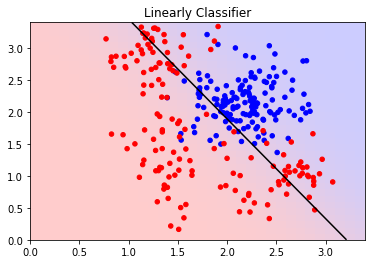

In [33]:
plt.title('Linearly Classifier')
plt.pcolor(xx, yy, np.array(pred).reshape(xx.shape), cmap=LightRdBu, vmin=0, vmax=1)
plt.contour(xx, yy, np.array(pred).reshape(xx.shape), levels=[0.5], cmap='gray')
plt.scatter(train_X[:,0], train_X[:,1], s=20, c=train_Y,  cmap=BinaryRdBu, vmin=0, vmax=1)
plt.show()

## Neural network is a stacked ensemble of linear classifiers ?
  Lets now train a neural network with one hidden layer with 2 neuron and one output layer.
  
  So the n/w architecture is 2 input neurons, 2 hidden neurons and 1 output neuron. Each of the hidden neuron can be considered as a linear classifier trying to classify seperately and then the output neuron can be considered as a classifier that adjusts the 2 classfiers linearly to form a final classifier.
   Lets prove the above!
        

In [34]:
#Tensorflow neural network

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None,1])

#Input to hidden units
w_i_h = tf.Variable(tf.truncated_normal([2, 2],mean=0, stddev=0.1))
b_i_h = tf.Variable(tf.zeros([2]))
hidden = tf.sigmoid(tf.matmul(x, w_i_h) + b_i_h)

#hidden to output
w_h_o = tf.Variable(tf.truncated_normal([2, 1],mean=0, stddev=0.1))
b_h_o = tf.Variable(tf.zeros([1]))
logits = tf.sigmoid(tf.matmul(hidden, w_h_o) + b_h_o)

cost = tf.reduce_mean(tf.square(logits-y))

#cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), axis=1))
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cost)

correct_prediction = tf.equal(tf.sign(logits-0.5), tf.sign(y-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
#Initialize all variables
init = tf.global_variables_initializer()


In [35]:
#Launch the graph
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(3000):
        _, c = sess.run([optimizer, cost], feed_dict={x:train_X, y:np.reshape(train_Y, (train_Y.shape[0],1))})
        if epoch%1000 == 0:
            print('Epoch: %d' %(epoch+1), 'cost = {:0.4f}'.format(c), end='\r')
    acc = sess.run([accuracy] , feed_dict={x:train_X, y:np.reshape(train_Y, (train_Y.shape[0],1))}) 
    print('\n Accuracy:', acc)

    xx, yy = np.mgrid[0:3.5:0.1, 0:3.5:0.1]
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_1 = sess.run([logits], feed_dict={x:grid})
    hidden = sess.run([hidden], feed_dict={x:grid})

Epoch: 2001 cost = 0.0501
 Accuracy: [0.94333333]


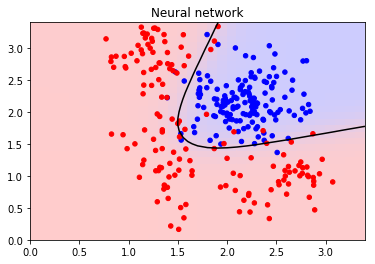

In [36]:

plt.title('Neural network')
plt.pcolor(xx, yy, np.array(pred_1).reshape(xx.shape), cmap=LightRdBu, vmin=0.0, vmax=1)
plt.contour(xx, yy, np.array(pred_1).reshape(xx.shape), levels=[0.5], cmap='gray')
plt.scatter(train_X[:,0], train_X[:,1], s=20, c=train_Y,  cmap=BinaryRdBu, vmin=0, vmax=1)
plt.show()

Now lets plot the input to hidden layers classifiers seperately. 

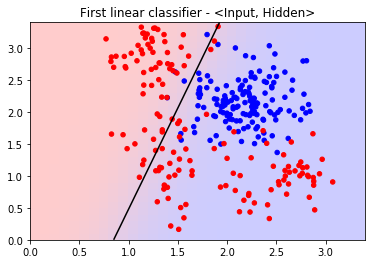

In [37]:
hidden = np.array(hidden).reshape(grid.shape)
plt.title('First linear classifier - <Input, Hidden>')
plt.pcolor(xx, yy, np.array(hidden[:,0]).reshape(xx.shape), cmap=LightRdBu, vmin=0.0, vmax=1)
plt.contour(xx, yy, np.array(hidden[:,0]).reshape(xx.shape), levels=[0.5], colors='k')
plt.scatter(train_X[:,0], train_X[:,1], s=20, c=train_Y,  cmap=BinaryRdBu, vmin=0, vmax=1)
plt.show()

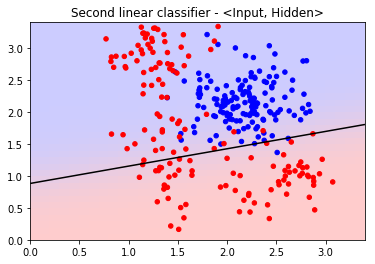

In [38]:
plt.title('Second linear classifier - <Input, Hidden>')
plt.pcolor(xx, yy, np.array(hidden[:,1]).reshape(xx.shape), cmap=LightRdBu, vmin=0.0, vmax=1)
plt.contour(xx, yy, np.array(hidden[:,1]).reshape(xx.shape), levels=[0.5], colors='k')
plt.scatter(train_X[:,0], train_X[:,1], s=20, c=train_Y,  cmap=BinaryRdBu, vmin=0, vmax=1)
plt.show()

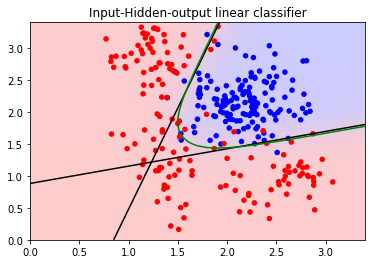

In [39]:
plt.title('Input-Hidden-output linear classifier')
plt.pcolor(xx, yy, np.array(pred_1).reshape(xx.shape), cmap=LightRdBu, vmin=0.0, vmax=1)
plt.contour(xx, yy, np.array(hidden[:,0]).reshape(xx.shape), levels=[0.5], colors='k')
plt.contour(xx, yy, np.array(hidden[:,1]).reshape(xx.shape), levels=[0.5], colors='k')
plt.contour(xx, yy, np.array(pred_1).reshape(xx.shape), levels=[0.5], colors='g')
plt.scatter(train_X[:,0], train_X[:,1], s=20, c=train_Y,  cmap=BinaryRdBu, vmin=0, vmax=1)
plt.show()

## Neural network is a ensemble of linear classifiers

In the above figure, we can see that the two hidden units act as two linear classifiers. The black lines represent them.
The hidden to output is another classifier which combines those 2 classifiers to achieve the objective of nonlinearity.

## lets remove the (sigmoid) activations in the network and see why its important

In [40]:
#Tensorflow neural network without activations

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None,1])

#Input to hidden units
w_i_h = tf.Variable(tf.truncated_normal([2, 2],mean=0.0, stddev=0.01))
b_i_h = tf.Variable(tf.zeros([2]))
hidden = (tf.matmul(x, w_i_h) + b_i_h)

#hidden to output
w_h_o = tf.Variable(tf.truncated_normal([2, 1],mean=0.0, stddev=0.01))
b_h_o = tf.Variable(tf.zeros([1]))
logits = (tf.matmul(hidden, w_h_o) + b_h_o)

cost = tf.reduce_mean(tf.square(logits-y)+0.0001)

#cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), axis=1))
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

correct_prediction = tf.equal(tf.sign(logits-0.5), tf.sign(y-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
#Initialize all variables
init = tf.global_variables_initializer()

In [42]:
#Launch the graph
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(3000):
        _, c = sess.run([optimizer, cost], feed_dict={x:train_X, y:np.reshape(train_Y, (train_Y.shape[0],1))})
        if epoch%1000 == 0:
            print('Epoch: %d' %(epoch+1), 'cost = {:0.4f}'.format(c), end='\r')
    acc = sess.run([accuracy] , feed_dict={x:train_X, y:np.reshape(train_Y, (train_Y.shape[0],1))}) 
    print('\n Accuracy:', acc)

    xx, yy = np.mgrid[0:3.5:0.1, 0:3.5:0.1]
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_2 = sess.run([logits], feed_dict={x:grid})

Epoch: 2001 cost = 0.1592
 Accuracy: [0.77666664]


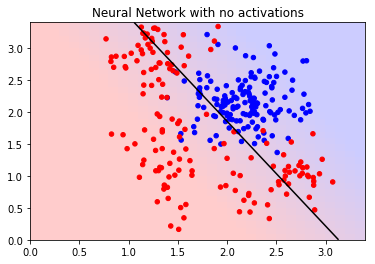

In [45]:
plt.scatter(train_X[:,0], train_X[:,1], c=train_Y)
plt.title('Neural Network with no activations')
plt.pcolor(xx, yy, np.array(pred_2).reshape(xx.shape), cmap=LightRdBu, vmin=0.0, vmax=1)
plt.contour(xx, yy, np.array(pred_2).reshape(xx.shape), levels=[0.5], cmap='gray')
plt.scatter(train_X[:,0], train_X[:,1], s=20, c=train_Y,  cmap=BinaryRdBu, vmin=0, vmax=1)
plt.show()

### When the activations are removed, the entire network collapses to a single linear classifier.
For example,

hidden = (tf.matmul(x, w_i_h) + b_i_h)   
logits = (tf.matmul(hidden, w_h_o) + b_h_o)

The above stack operation is just linear operation. So the above 2 equations collapes to a single - tf.matmul(x, new_weight) + new_biases. This applies for any number of layers - it will collapse into a single linear classifier